# Data Science Challenge

In [1]:
# To install packages that are not installed by default, uncomment the last two lines of this cell 
# and replace <package list> with a list of packages to import.
# This will ensure the notebook has all the dependencies and works everywhere.

#import sys
#!{sys.executable} -m pip install <package list>

In [2]:
# Libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
pd.set_option("display.max_columns", 101)

## Data Description

Column | Description
:---|:---
`id` | Identification number for the flight.
`dep_stn` | Departure point.
`arr_stn` | Arrival point.
`ac_code` | Aircraft Code. 
`dep_date` | Scheduled departure date.	
`arr_date` | Scheduled arrival date.
`weather` | Observed weather conditions at departure.
`hobbs_meter` | The time in hours that an aircraft has been in use.
`year_man` | Year of manufacturer for the aircraft.
`dep_country` | Departure country.
`arr_country` | Destination country.
`delay` | Number of minutes a flight was delayed.

## Data Wrangling & Visualization

In [39]:
# Dataset is already loaded below
data = pd.read_csv("train.csv")
test = pd.read_csv('test.csv')

In [40]:
data.head()

,id,dep_stn,arr_stn,ac_code,dep_date,arr_date,weather,hobbs_meter,year_man,dep_country,arr_country,delay
0,TU 0930,TUN,MRS,TU 32AIMD,2016-01-01 07:55:00,2016-01-01 09.30.00,sunny,4390,2004-08,Tunisia,France,18.0
1,TU 0526,TUN,DUS,TU 736IOQ,2016-01-01 08:20:00,2016-01-01 11.05.00,rainy,5882,2010-01,Tunisia,Germany,39.0
2,TU 0718,TUN,ORY,TU 320IMU,2016-01-01 10:05:00,2016-01-01 12.25.00,foggy,6117,2011-03,Tunisia,France,14.0
3,TU 0997,NCE,TUN,TU 320IMT,2016-01-01 10:15:00,2016-01-01 11.50.00,sunny,8941,2010-01,France,Tunisia,25.0
4,TU 0700,TUN,GVA,TU 320IMV,2016-01-01 12:40:00,2016-01-01 14.35.00,stormy,4301,2004-08,Tunisia,Switzerland,21.0


In [41]:
#Explore columns
data.columns

Index(['id', 'dep_stn', 'arr_stn', 'ac_code', 'dep_date', 'arr_date',
       'weather', 'hobbs_meter', 'year_man', 'dep_country', 'arr_country',
       'delay'],
      dtype='object')

In [42]:
#Description of all features
data.describe(include='all')

,id,dep_stn,arr_stn,ac_code,dep_date,arr_date,weather,hobbs_meter,year_man,dep_country,arr_country,delay
count,5000,5000,5000,5000,5000,5000,5000,5000.000000,5000,5000,5000,5000.00000
unique,422,70,68,47,4865,4881,6,NaN,9,35,33,NaN
top,TU 0744,TUN,TUN,TU 320IMV,2017-01-05 10:30:00,2016-09-05 09.10.00,rainy,NaN,2004-08,Tunisia,Tunisia,NaN
freq,90,2072,1963,256,3,3,851,NaN,1426,2471,2478,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6186.797000,NaN,NaN,NaN,20.51060
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1693.004034,NaN,NaN,NaN,12.27381
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3329.000000,NaN,NaN,NaN,2.00000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4501.000000,NaN,NaN,NaN,10.00000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6099.000000,NaN,NaN,NaN,18.00000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7437.000000,NaN,NaN,NaN,30.00000


- Unique Row tells about how many different categories or classes there in that feature
- Top tells the highest frequency element in the dataset

In [43]:
## Number of Nan's
data.isnull().sum(axis=0)

id             0
dep_stn        0
arr_stn        0
ac_code        0
dep_date       0
arr_date       0
weather        0
hobbs_meter    0
year_man       0
dep_country    0
arr_country    0
delay          0
dtype: int64

In [44]:
test.isnull().sum(axis=0)

id             0
dep_stn        0
arr_stn        0
ac_code        0
dep_date       0
arr_date       0
weather        0
hobbs_meter    0
year_man       0
dep_country    0
arr_country    0
dtype: int64

- There are No missing values in the dataset

In [45]:
data.dep_stn.value_counts()

TUN    2072
ORY     463
DJE     253
MRS     177
MIR     135
       ... 
NAP       1
KGL       1
OPO       1
CRL       1
BTS       1
Name: dep_stn, Length: 70, dtype: int64

## Preprocessing

In [104]:
test.head(2)

,id,dep_stn,arr_stn,ac_code,dep_date,arr_date,weather,hobbs_meter,year_man,dep_country,arr_country
0,TU 0216,TUN,IST,TU 320IMV,2017-11-08 16:00:00,2017-11-08 18.35.00,stormy,4301,2004-08,Tunisia,Turkey
1,TU 0543,MUC,TUN,TU 320IMU,2017-11-08 16:05:00,2017-11-08 18.10.00,stormy,6117,2011-03,Germany,Tunisia


- Need to correct the Arrival date format

In [105]:
## correct the arr_date format
data['arr_date'] = data['arr_date'].str.replace('.',':')

test['arr_date'] = test['arr_date'].str.replace('.',':')

/tmp/ipykernel_358/2627049365.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['arr_date'] = data['arr_date'].str.replace('.',':')
/tmp/ipykernel_358/2627049365.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  test['arr_date'] = test['arr_date'].str.replace('.',':')


## Feature Engineering

In [106]:
# Calculate the Difference between arrival and departure time
data['tot_hour_diff'] = (pd.to_datetime(data.arr_date) - pd.to_datetime(data.dep_date)) / pd.Timedelta(hours=1)

test['tot_hour_diff'] = (pd.to_datetime(test.arr_date) - pd.to_datetime(test.dep_date)) / pd.Timedelta(hours=1)

In [107]:
## Get the day,month,year and day of the week from the Timestamp
data['Dep_day'] = pd.DatetimeIndex(data['dep_date']).day
data['Dep_month'] = pd.DatetimeIndex(data['dep_date']).month
data['Dep_year'] = pd.DatetimeIndex(data['dep_date']).year
data['Dep_weekday'] = pd.to_datetime(data['dep_date']).dt.day_name()

test['Dep_day'] = pd.DatetimeIndex(test['dep_date']).day
test['Dep_month'] = pd.DatetimeIndex(test['dep_date']).month
test['Dep_year'] = pd.DatetimeIndex(test['dep_date']).year
test['Dep_weekday'] = pd.to_datetime(test['dep_date']).dt.day_name()

In [108]:
## Calculated the Age of the Aircraft
data[['Man_year','Man_month']] = data['year_man'].str.split('-',1,expand=True)
data['flight_age'] = data['Dep_year'].astype(int) - data['Man_year'].astype(int)

test[['Man_year','Man_month']] = test['year_man'].str.split('-',1,expand=True)
test['flight_age'] = test['Dep_year'].astype(int) - test['Man_year'].astype(int)

In [82]:
data.head()

,id,dep_stn,arr_stn,ac_code,dep_date,arr_date,weather,hobbs_meter,year_man,dep_country,arr_country,delay,Dep_day,Dep_month,Dep_year,Dep_weekday,time_delta,tot_hour_diff,Man_year,Man_month,flight_age
0,TU 0930,TUN,MRS,TU 32AIMD,2016-01-01 07:55:00,2016-01-01 09:30:00,sunny,4390,2004-08,Tunisia,France,18.0,1,1,2016,Friday,0 days 01:35:00,1.583333,2004,08,12
1,TU 0526,TUN,DUS,TU 736IOQ,2016-01-01 08:20:00,2016-01-01 11:05:00,rainy,5882,2010-01,Tunisia,Germany,39.0,1,1,2016,Friday,0 days 02:45:00,2.750000,2010,01,6
2,TU 0718,TUN,ORY,TU 320IMU,2016-01-01 10:05:00,2016-01-01 12:25:00,foggy,6117,2011-03,Tunisia,France,14.0,1,1,2016,Friday,0 days 02:20:00,2.333333,2011,03,5
3,TU 0997,NCE,TUN,TU 320IMT,2016-01-01 10:15:00,2016-01-01 11:50:00,sunny,8941,2010-01,France,Tunisia,25.0,1,1,2016,Friday,0 days 01:35:00,1.583333,2010,01,6
4,TU 0700,TUN,GVA,TU 320IMV,2016-01-01 12:40:00,2016-01-01 14:35:00,stormy,4301,2004-08,Tunisia,Switzerland,21.0,1,1,2016,Friday,0 days 01:55:00,1.916667,2004,08,12


### Created Following New features

- Calculated the Difference between arrival and departure time.
- Get the day,month,year and day of the week from the Timestamp
- Calculated the Age of the Aircraft

## Visualization, Modeling, Machine Learning

Build a regression model to predict how many minutes a flight will be delayed. Please explain the findings effectively to technical and non-technical audiences using comments and visualizations, if appropriate.
- **Build an optimized model that effectively solves the business problem.**
- **The model's performance will be evaluated on mean absolute percent error.**
- **Read the test.csv file and prepare features for testing.**

## Visualization

Text(0.5, 1.0, 'Distribution of the target variable')

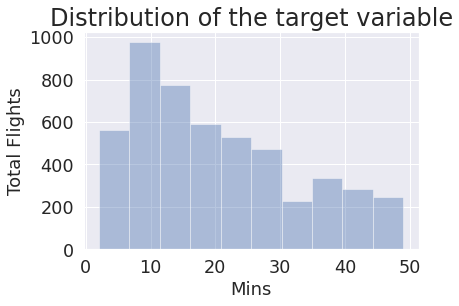

In [223]:
sns.distplot(data['delay'],bins=10,kde=False)
plt.xlabel('Mins', fontsize=18)
plt.ylabel('Total Flights', fontsize=18)
plt.title('Distribution of the target variable', fontsize=24)

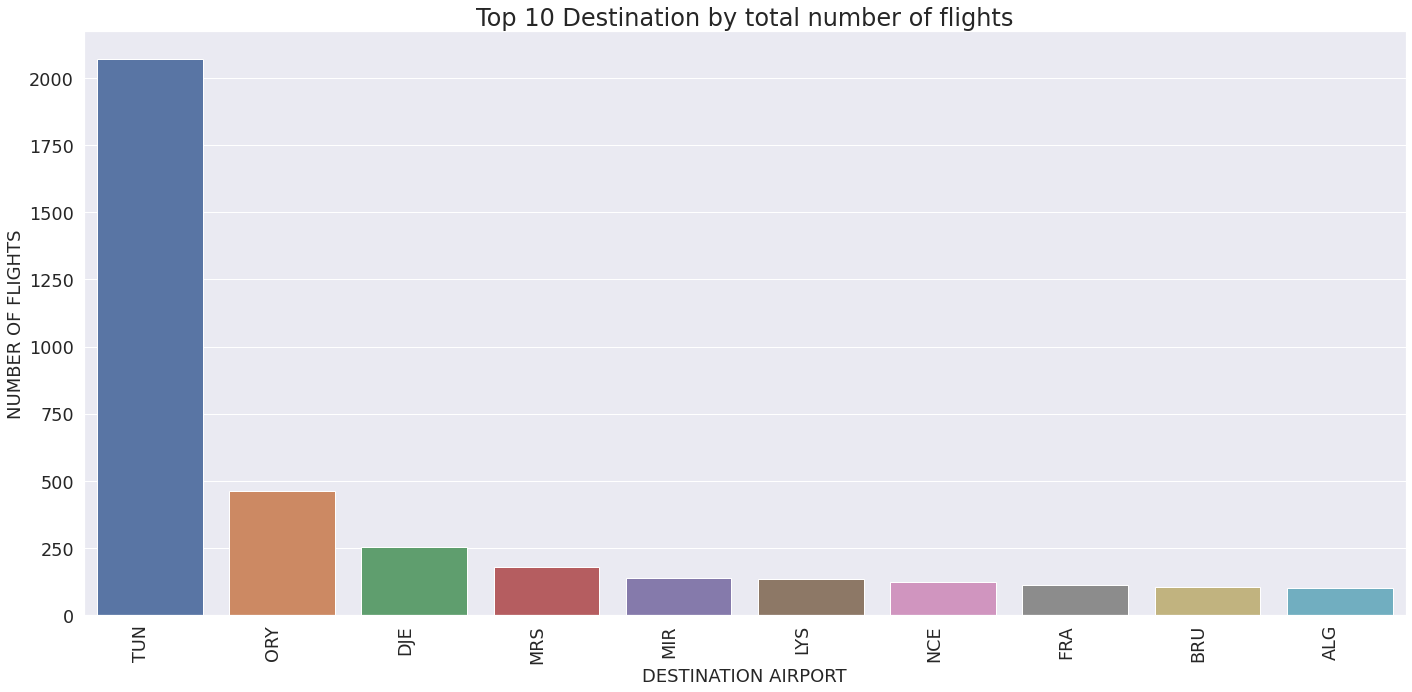

In [18]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.6)
axis = sns.countplot(x=data['dep_stn'], data=data, order=data['dep_stn'].value_counts().iloc[0:10].index, orient="v")
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('Top 10 Destination by total number of flights', fontsize=24)
plt.xlabel('DESTINATION AIRPORT', fontsize=18)
plt.ylabel('NUMBER OF FLIGHTS', fontsize=18)
plt.tight_layout()
plt.show()

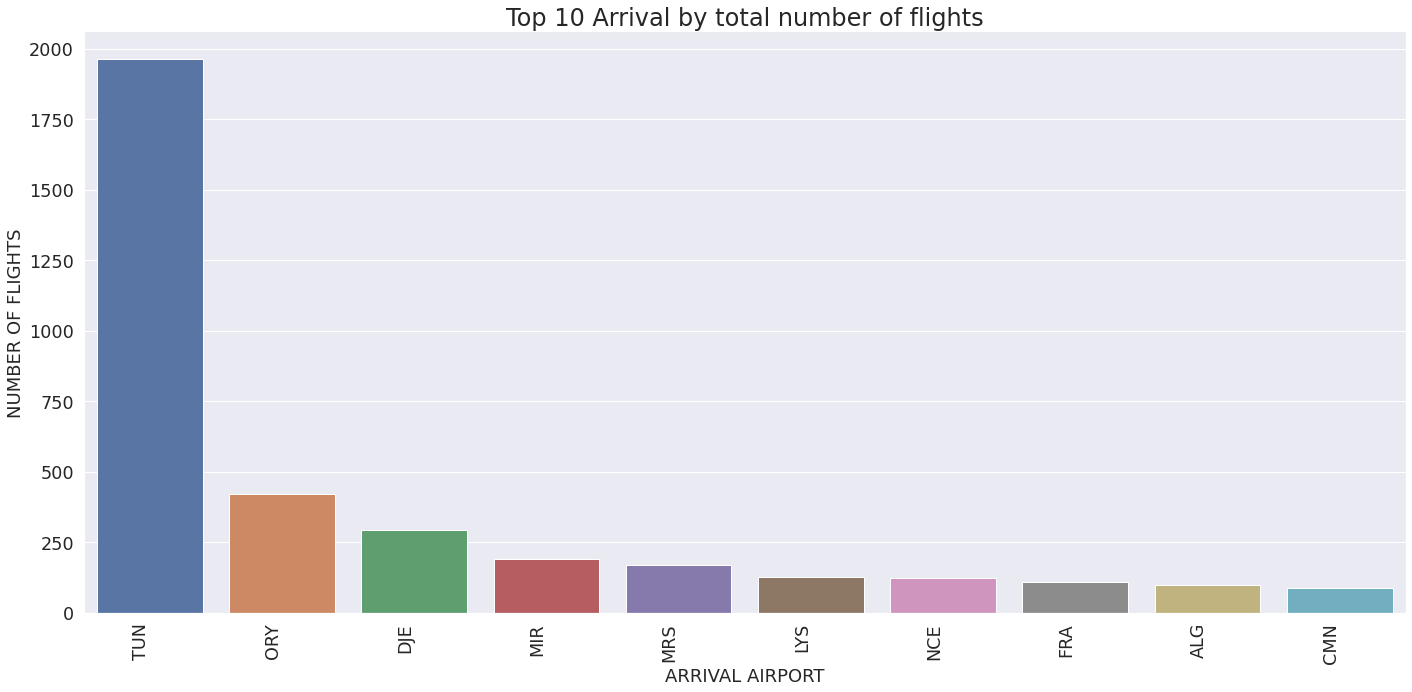

In [85]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.6)
axis = sns.countplot(x=data['arr_stn'], data=data, order=data['arr_stn'].value_counts().iloc[0:10].index, orient="v")
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('Top 10 Arrival by total number of flights', fontsize=24)
plt.xlabel('ARRIVAL AIRPORT', fontsize=18)
plt.ylabel('NUMBER OF FLIGHTS', fontsize=18)
plt.tight_layout()
plt.show()

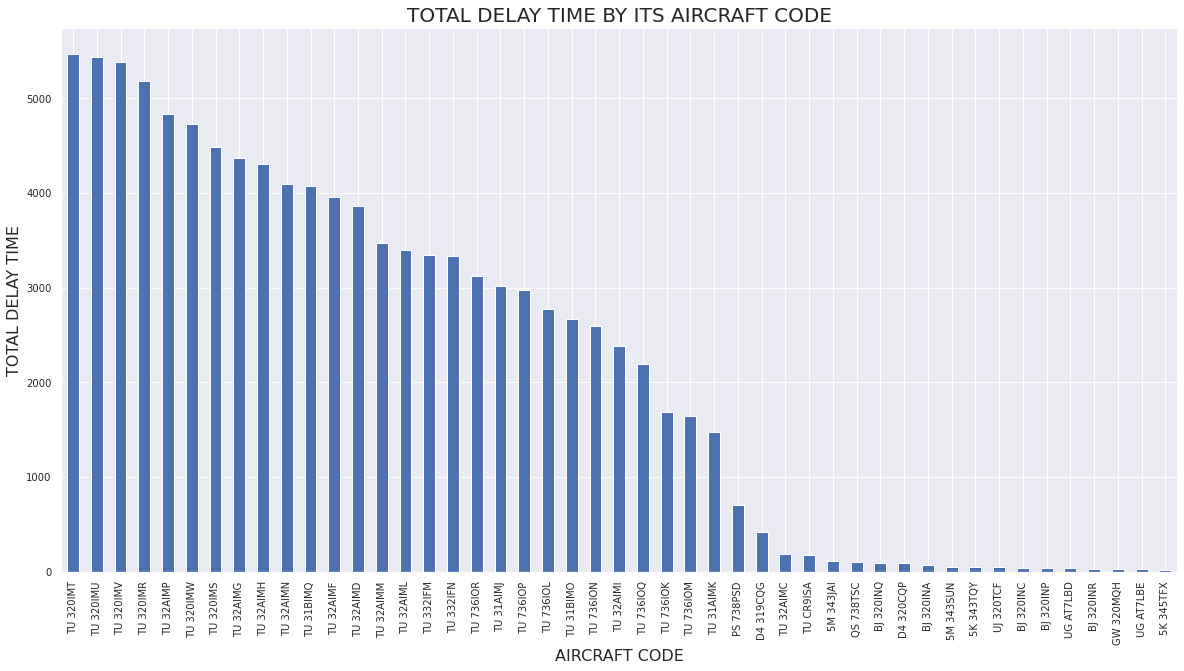

In [88]:
plt.figure(figsize=(20, 10))
data.groupby('ac_code').delay.sum().sort_values(ascending=False).plot.bar()
plt.title('TOTAL DELAY TIME BY ITS AIRCRAFT CODE', fontsize=20)
plt.xlabel('AIRCRAFT CODE', fontsize=16)
plt.ylabel('TOTAL DELAY TIME', fontsize=16)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.show()

In [90]:
test_3 = data[['ac_code', 'delay']]
test_3 = test_3.groupby(['ac_code']).mean().reset_index()
test_3.rename({'delay': 'avg_delay'}, axis=1, inplace=True)
test_3 = test_3.sort_values(['avg_delay']).reset_index(drop=True)
test_3.head(18)

,ac_code,avg_delay
0,TU 32AIMC,14.230769
1,UG AT7LBE,15.000000
2,5K 345TFX,15.000000
3,TU 31BIMO,17.206452
4,UG AT7LBD,17.500000
5,TU 736IOK,17.789474
6,D4 320CQP,17.800000
7,TU 31AIMK,18.036585
8,TU 736IOR,18.364706
9,TU 32AIML,18.367568


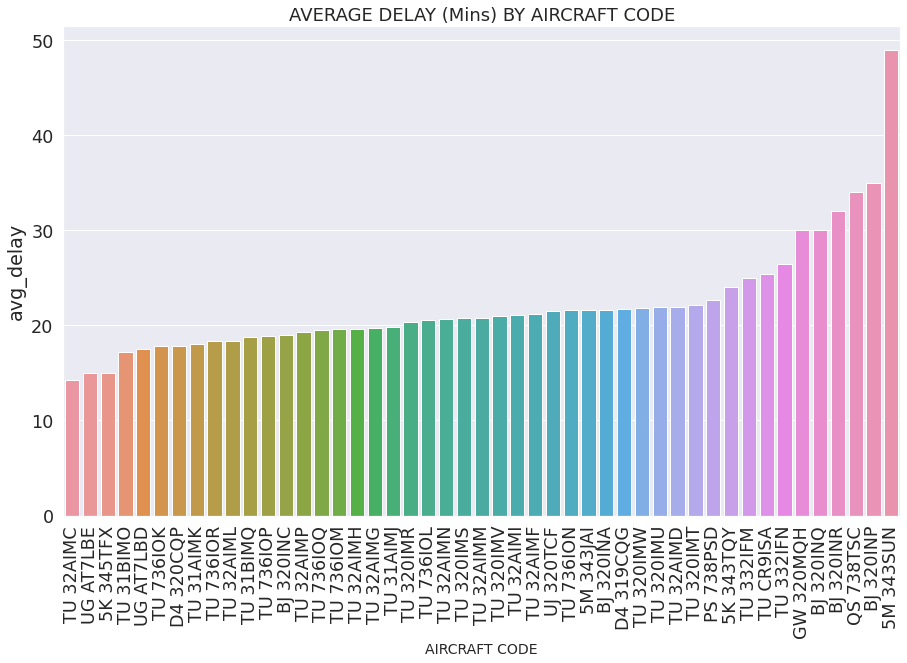

In [98]:
fig = plt.figure(1, figsize=(15,9))
sns.set(font_scale=1.6)
ax = sns.barplot(x='ac_code', y='avg_delay', data=test_3)
ax.set_title('AVERAGE DELAY (Mins) BY AIRCRAFT CODE', fontsize=18)
ax.set_xlabel('AIRCRAFT CODE', fontsize=14)
plt.xticks(rotation=90)
plt.show()

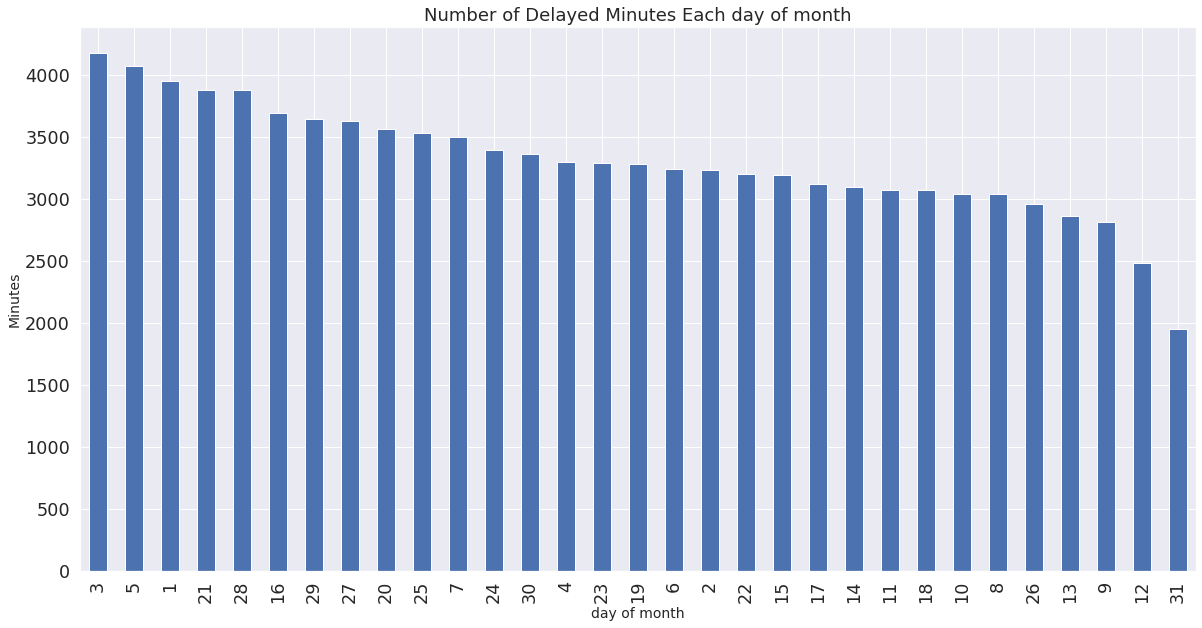

In [101]:
plt.figure(figsize=(20, 10))
data.groupby('Dep_day').delay.sum().sort_values(ascending=False).plot.bar()
plt.title('Number of Delayed Minutes Each day of month', fontsize=18)
plt.xlabel('day of month', fontsize=14)
plt.ylabel('Minutes', fontsize=14)
plt.show()

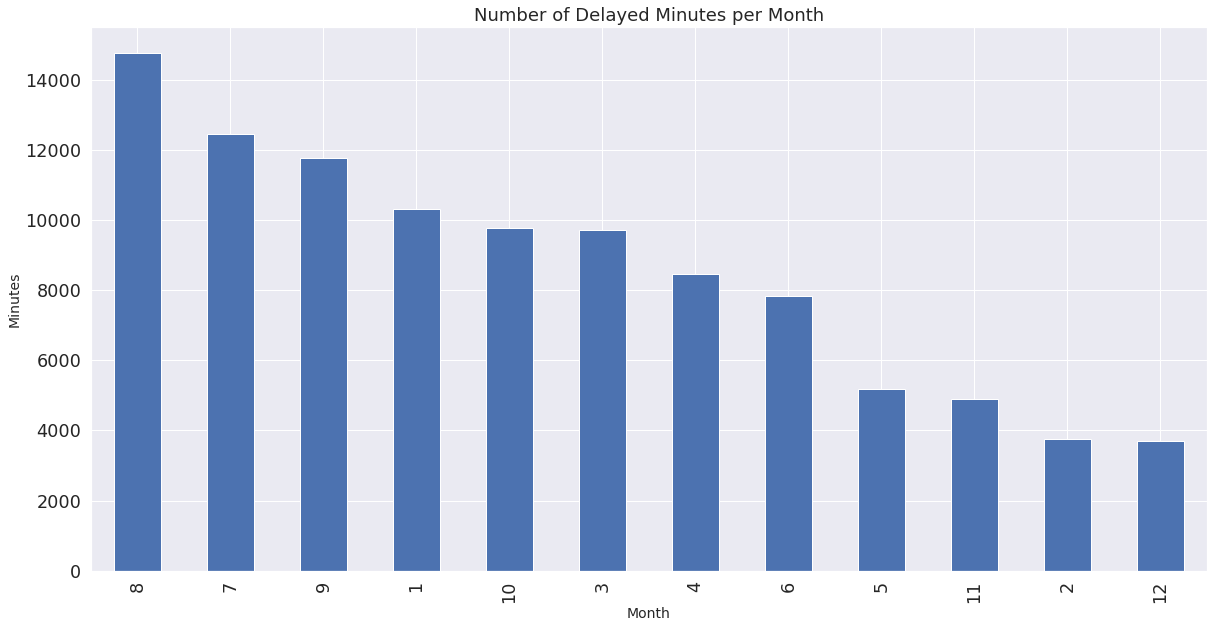

In [97]:
plt.figure(figsize=(20, 10))
data.groupby('Dep_month').delay.sum().sort_values(ascending=False).plot.bar()
plt.title('Number of Delayed Minutes per Month', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Minutes', fontsize=14)
plt.show()

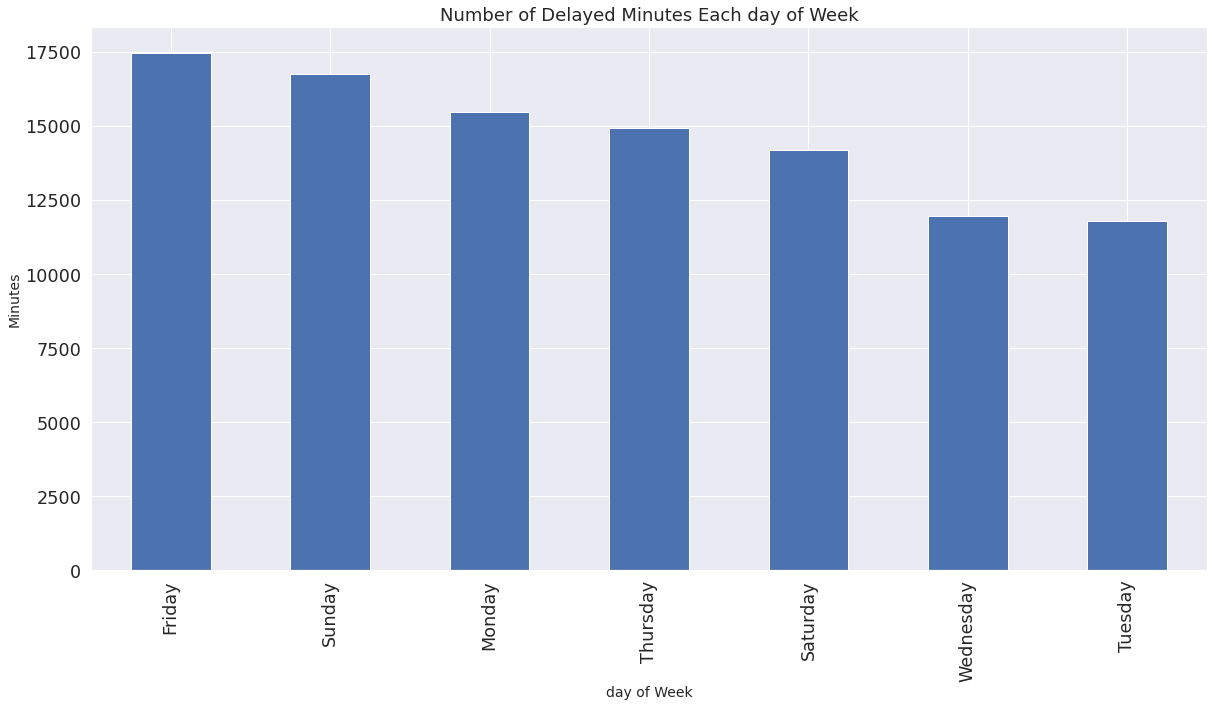

In [103]:
plt.figure(figsize=(20, 10))
data.groupby('Dep_weekday').delay.sum().sort_values(ascending=False).plot.bar()
plt.title('Number of Delayed Minutes Each day of Week', fontsize=18)
plt.xlabel('day of Week', fontsize=14)
plt.ylabel('Minutes', fontsize=14)
plt.show()

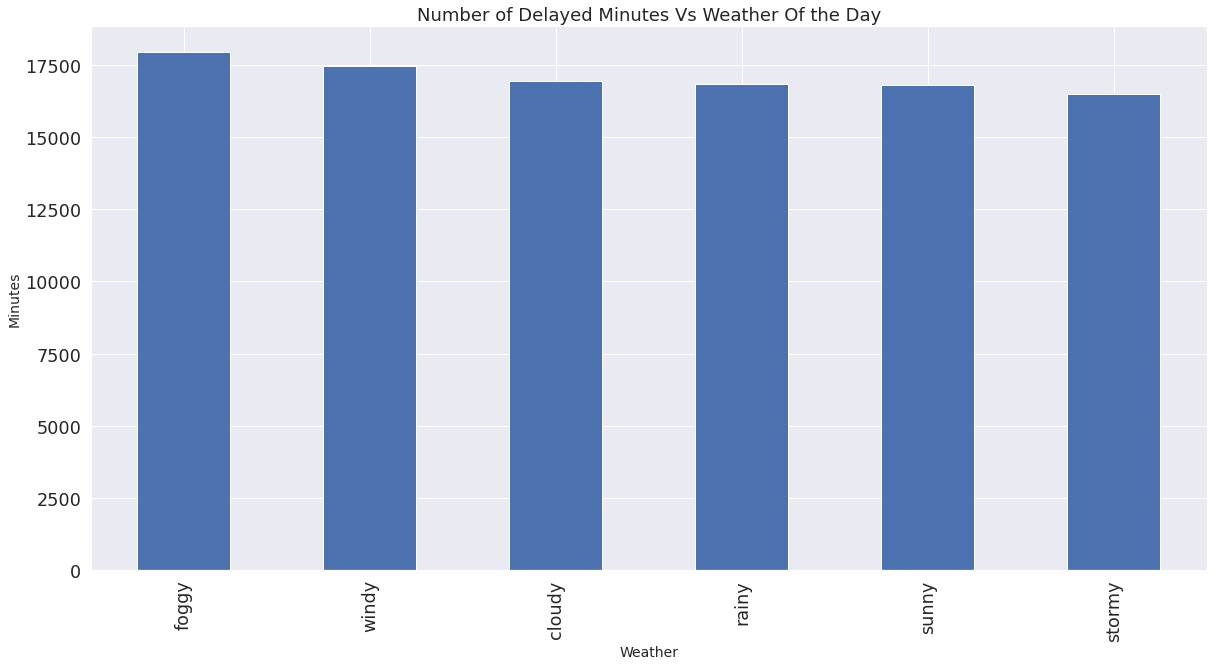

In [111]:
plt.figure(figsize=(20, 10))
data.groupby('weather').delay.sum().sort_values(ascending=False).plot.bar()
plt.title('Number of Delayed Minutes Vs Weather Of the Day', fontsize=18)
plt.xlabel('Weather', fontsize=14)
plt.ylabel('Minutes', fontsize=14)
plt.show()

## Observations
- Most of the flights are 10 to 20 mins delayed
- TUN is the most arrived and departured country, kind of make sense as the data seems to be from that region.
- TU 320IMU, TU 320IMT are the Flights which have highest delay time.
- 5M 343SUN has the highest Average delay Time.
- Start week of the Month most of the flights are delayed
- 31st low number can't be taken into consideration as there are only half the months have 31 days.
- July and August are the months when flights are mostly delayed
- Most number of delay time is on Friday and Sunday
- There is not much effect seem from the weather condition on Flight delay

## Preparation for Modelling

In [140]:
## drop these columns as we already created features out of it
to_drop = ['id','dep_date','arr_date','year_man']

## need to label encode these features
label_encode = ['weather','dep_country','arr_country','Dep_weekday','dep_stn','arr_stn','ac_code']

### Difference between Train and Test Data

In [165]:

print('Departure country not in Train: ',set(test['dep_country'].unique()) - set(data['dep_country'].unique()))

print('Arrival country not in Train: ',set(test['arr_country'].unique()) - set(data['arr_country'].unique()))

print('Departure Airport not in Train: ',set(test['dep_stn'].unique()) - set(data['dep_stn'].unique()))

print('Arrival Airport not in Train: ',set(test['arr_stn'].unique()) - set(data['arr_stn'].unique()))

print('Aircraft Code not in Train: ',set(test['ac_code'].unique()) - set(data['ac_code'].unique()))

Departure country not in Train:  {'Slovenia'}
Arrival country not in Train:  {'Ukraine', 'Sicily, Italy', 'Denmark', 'Luxembourg', 'Slovakia'}
Departure Airport not in Train:  {'HAJ', 'LIL', 'CAG', 'VRN', 'ATH', 'TBJ', 'LJU', 'VKO'}
Arrival Airport not in Train:  {'HAJ', 'BLL', 'HBE', 'VRN', 'PMO', 'LUX', 'LIL', 'BTS', 'IEV', 'NAP', 'VKO'}
Aircraft Code not in Train:  {'GJ 734MGC', 'GJ 734CGC', 'GJ 733GGC', 'GJ 733EWE', '5M 343FOX', 'GJ 734PGC', 'GJ 733LGC', 'BJ 320INB'}


In [170]:
data['Man_month'] = data['Man_month'].astype(int)
data['Man_year'] = data['Man_year'].astype(int)

test['Man_month'] = test['Man_month'].astype(int)
test['Man_year'] = test['Man_year'].astype(int)

In [171]:
train_id = data['id']
test_id = test['id']

y = data['delay']
train = data.drop(to_drop,axis=1)
test1 = test.drop(to_drop,axis=1)

train.drop(['delay'],axis=1,inplace=True)

In [172]:
print(train.shape)
print(test1.shape)

(5000, 15)
(3000, 15)


In [173]:
combined = pd.concat([train,test1],axis=0)

In [174]:
combined.head()

,dep_stn,arr_stn,ac_code,weather,hobbs_meter,dep_country,arr_country,Dep_day,Dep_month,Dep_year,Dep_weekday,tot_hour_diff,Man_year,Man_month,flight_age
0,TUN,MRS,TU 32AIMD,sunny,4390,Tunisia,France,1,1,2016,Friday,1.583333,2004,8,12
1,TUN,DUS,TU 736IOQ,rainy,5882,Tunisia,Germany,1,1,2016,Friday,2.750000,2010,1,6
2,TUN,ORY,TU 320IMU,foggy,6117,Tunisia,France,1,1,2016,Friday,2.333333,2011,3,5
3,NCE,TUN,TU 320IMT,sunny,8941,France,Tunisia,1,1,2016,Friday,1.583333,2010,1,6
4,TUN,GVA,TU 320IMV,stormy,4301,Tunisia,Switzerland,1,1,2016,Friday,1.916667,2004,8,12


#### Label encode using combine set as there is unseen label in test data

In [175]:
##lable encoding
from sklearn import preprocessing

for feat in label_encode:
    print(feat)
    le = preprocessing.LabelEncoder()
    le.fit(combined[feat])
    train[feat] = le.transform(train[feat])
    test1[feat] = le.transform(test1[feat])
# data['department'] = le.fit(data['department'])

weather
dep_country
arr_country
Dep_weekday
dep_stn
arr_stn
ac_code


In [192]:
train.head()

,dep_stn,arr_stn,ac_code,weather,hobbs_meter,dep_country,arr_country,Dep_day,Dep_month,Dep_year,Dep_weekday,tot_hour_diff,Man_year,Man_month,flight_age
0,71,47,33,4,4390,33,9,1,1,2016,0,1.583333,2004,8,12
1,71,24,49,2,5882,33,10,1,1,2016,0,2.750000,2010,1,6
2,71,58,29,1,6117,33,9,1,1,2016,0,2.333333,2011,3,5
3,50,72,28,4,8941,8,34,1,1,2016,0,1.583333,2010,1,6
4,71,28,30,3,4301,33,33,1,1,2016,0,1.916667,2004,8,12


## Modelling

In [202]:
from sklearn.ensemble import RandomForestRegressor

def Do_kfold_validation(model='xgb'):
    fold = 3
    st_train = train.values
    st_test = test1.values
    cv = KFold(n_splits=fold,shuffle=True, random_state=30)
    X_preds = np.zeros(st_train.shape[0])
    preds = np.zeros(st_test.shape[0])
    for i, (tr, ts) in enumerate(cv.split(y)):
        if model=='xgb':
            clf = xgb.XGBRegressor(verbosity=0)
        elif model=='rf':
            clf = RandomForestRegressor()
        mod = clf.fit(st_train[tr], y[tr])
        X_preds[ts] = mod.predict(st_train[ts])
        preds += mod.predict(st_test)
        print("fold Number {}, Mean Absolute Error: {:.3f}".format(i, mean_absolute_percentage_error(y[ts], X_preds[ts])))
    score = mean_absolute_percentage_error(y, X_preds)
    print(score)

In [203]:
Do_kfold_validation('xgb')

fold Number 0, Mean Absolute Error: 0.833
fold Number 1, Mean Absolute Error: 0.832
fold Number 2, Mean Absolute Error: 0.865
0.8435330097921895


In [204]:
Do_kfold_validation('rf')

fold Number 0, Mean Absolute Error: 0.823
fold Number 1, Mean Absolute Error: 0.829
fold Number 2, Mean Absolute Error: 0.881
0.8444553748035967


In [212]:
clf = RandomForestRegressor()
clf.fit(train, y)

RandomForestRegressor()


**Describe the most important features of the model to management.**

> #### Task:
- **Visualize the top 10 features and their feature importance.**


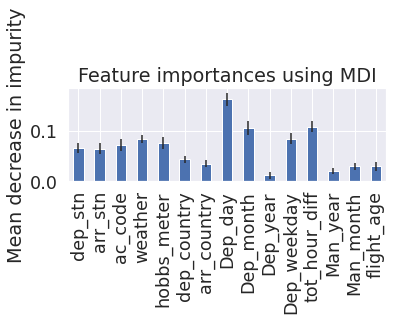

In [213]:
## Random Forest Feature Importance
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
feature_names = train.columns
forest_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [214]:
clf = xgb.XGBRegressor(verbosity=0)
clf.fit(train, y)

/opt/conda/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=2,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=0)

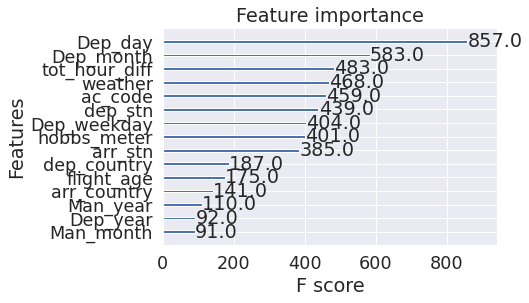

In [215]:
## Xgboost Feature Importance
from xgboost import plot_importance
plot_importance(clf)
pyplot.show()

## Both Random Forest and Xgboost Feature Importance Summary
- Departure Day is the Most important feature to explain the Flight Delay as same we can see in the Above EDA.
- Departure Month is the second most Feature. Example Holiday month vs regular month
- Total Hour difference between Flights Departure and Arrival time is also very important Feature

> #### Task:
- **Submit the predictions on the test dataset using the optimized model** <br/>
    For each record in the test set (`test.csv`), predict how many minutes a flight will be delayed. Submit a CSV file with a header row and one row per test entry.

The file (`submissions.csv`) should have exactly 2 columns:
   - **id**
   - **delay**

In [216]:
test_pred = clf.predict(test1)

In [217]:
test_pred

array([22.850727 , 24.266363 , 26.101553 , ..., 19.50246  ,  5.2984004,
       12.056709 ], dtype=float32)

In [218]:
submission_df = pd.DataFrame({'id':test_id,'delay':test_pred})

In [219]:
submission_df.head()

,id,delay
0,TU 0216,22.850727
1,TU 0543,24.266363
2,TU 0527,26.101553
3,UG 0011,26.749496
4,TU 0214,22.738199


In [220]:
#Submission
submission_df.to_csv('submissions.csv',index=False)